In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
URL='https://database.lichess.org/'
req_data=requests.get(URL)

In [3]:
req_data.content

b'<!DOCTYPE html>\n<html lang="en-US">\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="chrome=1">\n    <link href="https://fonts.googleapis.com/css?family=Noto+Sans:400,700|Roboto:300" rel="stylesheet">\n    <style>/* http://meyerweb.com/eric/tools/css/reset/ v2.0 | 20110126 License: none (public domain)\n */\nhtml, body, div, span, applet, object, iframe, h1, h2, h3, h4, h5, h6, p, blockquote, pre, a, abbr, acronym, address, big, cite, code, del, dfn, em, img, ins, kbd, q, s, samp, small, strike, strong, sub, sup, tt, var, b, u, i, center, dl, dt, dd, ol, ul, li, fieldset, form, label, legend, table, caption, tbody, tfoot, thead, tr, th, td, article, aside, canvas, details, embed, figure, figcaption, footer, header, hgroup, menu, nav, output, ruby, section, summary, time, mark, audio, video { padding: 0; margin: 0; font: inherit; font-size: 100%; vertical-align: baseline; border: 0; }\n\n/* HTML5 display-role reset for older browsers */\narticle,

In [4]:
html_format=bs(req_data.content,'html.parser')

In [5]:
html_format

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://fonts.googleapis.com/css?family=Noto+Sans:400,700|Roboto:300" rel="stylesheet"/>
<style>/* http://meyerweb.com/eric/tools/css/reset/ v2.0 | 20110126 License: none (public domain)
 */
html, body, div, span, applet, object, iframe, h1, h2, h3, h4, h5, h6, p, blockquote, pre, a, abbr, acronym, address, big, cite, code, del, dfn, em, img, ins, kbd, q, s, samp, small, strike, strong, sub, sup, tt, var, b, u, i, center, dl, dt, dd, ol, ul, li, fieldset, form, label, legend, table, caption, tbody, tfoot, thead, tr, th, td, article, aside, canvas, details, embed, figure, figcaption, footer, header, hgroup, menu, nav, output, ruby, section, summary, time, mark, audio, video { padding: 0; margin: 0; font: inherit; font-size: 100%; vertical-align: baseline; border: 0; }

/* HTML5 display-role reset for older browsers */
article, aside, details, figcaption

In [7]:
all_r=html_format.find_all('div',{'class':'panel'})

In [8]:
all_r

[<div class="panel" id="standard_games">
 <section>
 <nav>
 <a class="on" href="#standard_games">Standard Chess</a>
 <a href="#variant_games">Variants</a>
 <a href="#puzzles">Puzzles</a>
 </nav>
 <p>
 <strong>1,973,860,947</strong> standard rated games, played on lichess.org, in PGN format.
   Each file contains the games for one month only; they are not cumulative.
 </p>
 <table>
 <thead>
 <tr>
 <th>Month</th>
 <th class="right">Size</th>
 <th class="right">Games</th>
 <th class="center">Clock</th>
 <th>Download</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>2021 - February</td>
 <td class="right">24.4 GB</td>
 <td class="right">89,892,001</td>
 <td class="center">✔</td>
 <td><a href="standard/lichess_db_standard_rated_2021-02.pgn.bz2">.pgn.bz2</a> <span class="sep">/</span> <a href="standard/lichess_db_standard_rated_2021-02.pgn.bz2.torrent">.torrent</a></td>
 </tr>
 <tr>
 <td>2021 - January</td>
 <td class="right">26 GB</td>
 <td class="right">95,853,038</td>
 <td class="center">✔</td>
 

In [40]:
total_games=all_r[0].find('p').find('strong').get_text()

In [42]:
total_games

'1,973,860,947'

In [50]:
headers=all_r[0].find_all('table')
headers

[<table>
 <thead>
 <tr>
 <th>Month</th>
 <th class="right">Size</th>
 <th class="right">Games</th>
 <th class="center">Clock</th>
 <th>Download</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>2021 - February</td>
 <td class="right">24.4 GB</td>
 <td class="right">89,892,001</td>
 <td class="center">✔</td>
 <td><a href="standard/lichess_db_standard_rated_2021-02.pgn.bz2">.pgn.bz2</a> <span class="sep">/</span> <a href="standard/lichess_db_standard_rated_2021-02.pgn.bz2.torrent">.torrent</a></td>
 </tr>
 <tr>
 <td>2021 - January</td>
 <td class="right">26 GB</td>
 <td class="right">95,853,038</td>
 <td class="center">✔</td>
 <td><a href="standard/lichess_db_standard_rated_2021-01.pgn.bz2">.pgn.bz2</a> <span class="sep">/</span> <a href="standard/lichess_db_standard_rated_2021-01.pgn.bz2.torrent">.torrent</a></td>
 </tr>
 <tr>
 <td>2020 - December</td>
 <td class="right">22.2 GB</td>
 <td class="right">89,422,803</td>
 <td class="center">✔</td>
 <td><a href="standard/lichess_db_standard_rated_2

In [58]:
header=headers[0].find_all('thead')[0].tr
header

<tr>
<th>Month</th>
<th class="right">Size</th>
<th class="right">Games</th>
<th class="center">Clock</th>
<th>Download</th>
</tr>

In [66]:
x=header.find_all('th')
x

[<th>Month</th>,
 <th class="right">Size</th>,
 <th class="right">Games</th>,
 <th class="center">Clock</th>,
 <th>Download</th>]

In [78]:
h=[]
for i in x:
    v=i.get_text()
    h.append(v)

In [79]:
h

['Month', 'Size', 'Games', 'Clock', 'Download']

In [83]:
rows=headers[0].find_all('tr')

In [85]:
len(rows)

100

In [94]:
r=[]
for i in rows:
    v=(i.get_text())
    r.append(v)

In [95]:
r=[i.split('\n') for i in r]
r

[['', 'Month', 'Size', 'Games', 'Clock', 'Download', ''],
 ['',
  '2021 - February',
  '24.4 GB',
  '89,892,001',
  '✔',
  '.pgn.bz2 / .torrent',
  ''],
 ['', '2021 - January', '26 GB', '95,853,038', '✔', '.pgn.bz2 / .torrent', ''],
 ['',
  '2020 - December',
  '22.2 GB',
  '89,422,803',
  '✔',
  '.pgn.bz2 / .torrent',
  ''],
 ['',
  '2020 - November',
  '19.4 GB',
  '78,268,317',
  '✔',
  '.pgn.bz2 / .torrent',
  ''],
 ['',
  '2020 - October',
  '17.5 GB',
  '70,572,373',
  '✔',
  '.pgn.bz2 / .torrent',
  ''],
 ['',
  '2020 - September',
  '16.8 GB',
  '68,027,862',
  '✔',
  '.pgn.bz2 / .torrent',
  ''],
 ['',
  '2020 - August',
  '17.8 GB',
  '71,405,167',
  '✔',
  '.pgn.bz2 / .torrent',
  ''],
 ['', '2020 - July', '17.6 GB', '70,592,022', '✔', '.pgn.bz2 / .torrent', ''],
 ['', '2020 - June', '17.7 GB', '70,374,749', '✔', '.pgn.bz2 / .torrent', ''],
 ['', '2020 - May', '19.1 GB', '75,628,855', '✔', '.pgn.bz2 / .torrent', ''],
 ['', '2020 - April', '18.6 GB', '73,224,608', '✔', '.pgn.

In [98]:
import pandas as pd

In [118]:
data=pd.DataFrame(r)
data

,0,1,2,3,4,5,6
0,,Month,Size,Games,Clock,Download,
1,,2021 - February,24.4 GB,"89,892,001",✔,.pgn.bz2 / .torrent,
2,,2021 - January,26 GB,"95,853,038",✔,.pgn.bz2 / .torrent,
3,,2020 - December,22.2 GB,"89,422,803",✔,.pgn.bz2 / .torrent,
4,,2020 - November,19.4 GB,"78,268,317",✔,.pgn.bz2 / .torrent,
...,...,...,...,...,...,...,...
95,,2013 - April,21.1 MB,"157,871",,.pgn.bz2 / .torrent,
96,,2013 - March,21.3 MB,"158,635",,.pgn.bz2 / .torrent,
97,,2013 - February,16.4 MB,"123,961",,.pgn.bz2 / .torrent,
98,,2013 - January,16.1 MB,"121,332",,.pgn.bz2 / .torrent,


In [140]:
df1=data.drop([2,4,5,6],axis=1)
df1

,0,1,3
0,,Month,Games
1,,2021 - February,"89,892,001"
2,,2021 - January,"95,853,038"
3,,2020 - December,"89,422,803"
4,,2020 - November,"78,268,317"
...,...,...,...
95,,2013 - April,"157,871"
96,,2013 - March,"158,635"
97,,2013 - February,"123,961"
98,,2013 - January,"121,332"


In [141]:
df1.rename(columns=df1.iloc[0],inplace=True)
df1

,,Month,Games
0,,Month,Games
1,,2021 - February,"89,892,001"
2,,2021 - January,"95,853,038"
3,,2020 - December,"89,422,803"
4,,2020 - November,"78,268,317"
...,...,...,...
95,,2013 - April,"157,871"
96,,2013 - March,"158,635"
97,,2013 - February,"123,961"
98,,2013 - January,"121,332"


In [142]:
df1.drop(df1.index[0],inplace=True)

In [143]:
df1.drop(df1.index[98],inplace=True)

In [161]:
df1['Games']=df1['Games'].apply(lambda x:int(x.replace(',','')))

In [163]:
df1['Year']=df1['Year'].apply(lambda x:int(x))
df1['Month']=df1['Month'].apply(lambda x:pd.to_datetime(x))

In [166]:
df1

,,Month,Games,Year
1,,2021-02-01,89892001,2021
2,,2021-01-01,95853038,2021
3,,2020-12-01,89422803,2020
4,,2020-11-01,78268317,2020
5,,2020-10-01,70572373,2020
...,...,...,...,...
94,,2013-05-01,179550,2013
95,,2013-04-01,157871,2013
96,,2013-03-01,158635,2013
97,,2013-02-01,123961,2013


In [168]:
df2_temp=df1.groupby('Year').mean()
df2_temp

,Games
Year,
2013,2.822019e+05
2014,9.662859e+05
2015,2.505137e+06
2016,6.541591e+06
2017,1.234359e+07
2018,2.214522e+07
2019,3.640343e+07
2020,6.782221e+07
2021,9.287252e+07


In [137]:
import matplotlib.pyplot as py

<Figure size 432x288 with 0 Axes>

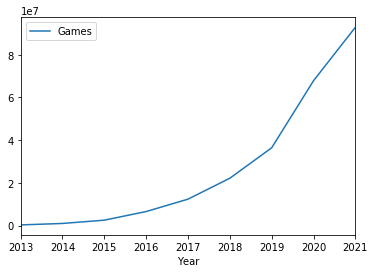

In [169]:
py.figure()
df2_temp.plot()

In [170]:
df1_temp=df1.drop(['Year'],axis=1)
df1_temp

,,Month,Games
1,,2021-02-01,89892001
2,,2021-01-01,95853038
3,,2020-12-01,89422803
4,,2020-11-01,78268317
5,,2020-10-01,70572373
...,...,...,...
94,,2013-05-01,179550
95,,2013-04-01,157871
96,,2013-03-01,158635
97,,2013-02-01,123961
